<a href="https://colab.research.google.com/github/diegokieck/mestrado/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
from google.colab import drive
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# IMPORTS


In [ ]:
drive.mount('/content/drive')
import sys
master_path = "/content/drive/MyDrive/masters"
sys.path.append(master_path)

Mounted at /content/drive


# Tratamento dos dados


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/masters/notas/nfe_balanced.csv', sep='|', names=['descricao', 'ncm'], index_col=0, header=0)

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['ncm'])
target_encoded = encoder.transform(data['ncm'])
text_target = to_categorical(target_encoded)

In [ ]:
X = data['descricao']
Y= text_target

In [ ]:
label_columns=list(data['ncm'].value_counts().index)

# Defining Transformer


In [ ]:
df=pd.concat([data.drop('ncm', axis=1), pd.get_dummies(data['ncm'])], axis=1)

In [ ]:
df.to_csv('/content/sample_data/amostra_onehot_py.csv')

In [ ]:
type(label_columns[0])

int

In [ ]:
df[33030010]

80917     0
19584     0
91071     0
95124     0
98894     0
         ..
132596    0
132882    0
141745    0
141746    0
141820    0
Name: 33030010, Length: 36234, dtype: uint8

In [ ]:
!pip install ktrain
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'/content/sample_data/amostra_onehot_py.csv',

In [ ]:
str_label_columns = [str(x) for x in label_columns]

In [ ]:
NUM_WORDS = 20000
MAXLEN = 50
trn, val,  preproc = text.texts_from_csv('/content/sample_data/amostra_onehot_py.csv',
                      'descricao',
                      label_columns = str_label_columns,
                      preprocess_mode='bert',
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)


detected encoding: utf-8 (if wrong, set manually)
['33059000', '33043000', '33069000', '39249000', '33049100', '96032100', '33030010', '34013000', '33072090', '34011190', '33042010', '33030020', '33041000', '33072010', '33049910', '33051000', '33049990', '33061000']
       33059000  33043000  33069000  39249000  33049100  96032100  33030010  \
24738         0         0         0         0         0         0         1   
28422         0         0         0         0         1         0         0   
2862          0         1         0         0         0         0         0   
18757         0         0         0         0         0         0         0   
23840         0         0         0         0         0         0         0   

       34013000  33072090  34011190  33042010  33030020  33041000  33072010  \
24738         0         0         0         0         0         0         0   
28422         0         0         0         0         0         0         0   
2862          0      

Is Multi-Label? False
preprocessing test...
language: pt


In [ ]:
model = text.text_classifier('bert', trn , preproc=preproc)


Is Multi-Label? False
maxlen is 50
done.


In [ ]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=8)

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4077/4077 [==============================] - 175s 36ms/step - loss: 14.4240 - accuracy: 0.1566


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


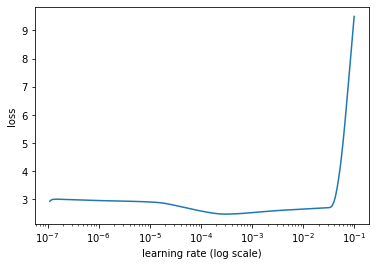

In [ ]:
learner.lr_plot()

In [ ]:
learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4077/4077 [==============================] - 440s 108ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.5749 - val_accuracy: 0.8615
Epoch 2/2
4077/4077 [==============================] - 451s 111ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.4742 - val_accuracy: 0.8979
